In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pylab as p
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. User input

## 1.1 Input and format Pareto optimal set

Input Pareto set (objectives and decision variables)

In [2]:
# Enter file name containing results. 1 row of headers only
opdata = pd.read_pickle("Data/opdata")

Create dataframe of decision variables

In [3]:
dvdf = pd.read_pickle("Data/dvdf")

Specify tick marks for decision variables for plots

In [4]:
dvticks = [0,0.2,0.4,0.6,0.8,1.0]

## 1.2 Input cluster membership

Enter cluster mapping. Rows must correspond with rows of objective values.

In this case study, k-medoids was used to cluster dataset, using R.

In [5]:
clusternos = pd.read_csv('Data/clusternos.csv', usecols = [1], header = 0, names = ['Cluster'])

## 1.3 Specify cluster colours and linestyles for plotting

Import or create colour pool for clusters (add colours to taste, depending on number of clusters).

In this instance we have already saved a pickle of clustercolours in the 'DO FIRST...' notebook.

In [6]:
clustcols = pd.read_pickle("Data/clustercolours")

In [29]:
linestyles = [[100,2], 
              [4,4], 
              [4,4,2,4], 
              [8,4],
              [2, 4, 7, 4],
              [10, 5, 100, 5], 
              [2, 4, 2, 4],
              [8, 4, 2, 4, 2, 4],
              [5,2,10,5],
              [10,20]
             ]

# 2. Functions

## 2.1 Function to determine number of rows and columns of subplots

Creates a list showing dimensions (rows and columns) of subplots, for a given number of plots. Columns have the greater of two dimensions, where relevant (i.e. landscape format).

In [7]:
def dimensions(numplots):
    cols = int(numplots**0.5) + (numplots % numplots**0.5 > 0) # rounds up the square root of numplots
    rows = int(numplots/cols) + (numplots % cols > 0) # rounds up the numplots divided by num cols
    return [rows, cols]

## 2.2 Function to separate a decision variable into dataframes for each cluster

Create function to separate clusters into dataframes.

Input: dataframe, list of cluster membership, and decision variable column name in dataframe

In [8]:
def clusterdf(data, clusterno, column):
    df = []
    for i in range(0, len(opdata)):
        if (clusternos.ix[i] == clusterno).bool():
            df.append(data[column][i])
    df = pd.DataFrame({column: df})
    return df

# 3. Execution

## 3.1 Plot histograms of values for each decision variable

Decision variable histograms for entire Pareto set, one variable per subplot

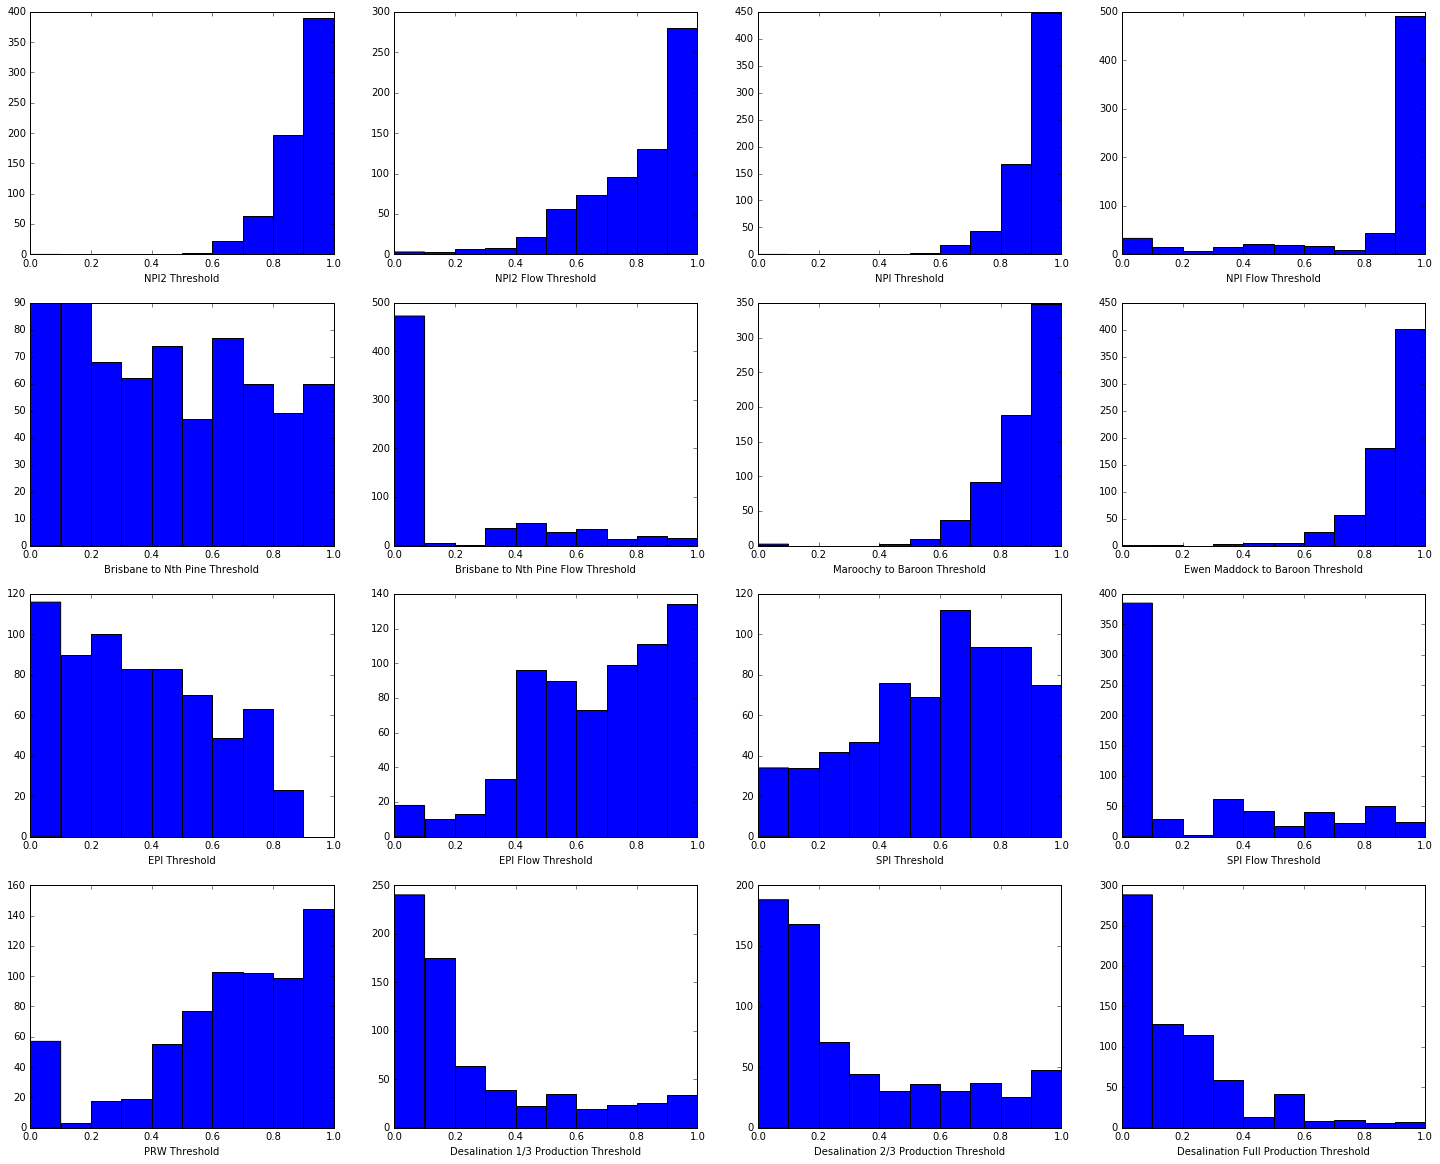

In [26]:
dims = dimensions(len(dvdf.columns))

fig = plt.figure(figsize = [dims[1]*5*1.25, dims[0]*5]) 
    #figsize adjusted for extra wspace between plots to alow for long xlabels

for i in range(0, len(dvdf.columns)):
    column = dvdf.columns[i]
    ax = fig.add_subplot(dims[0], dims[1], i+1)
    ax.hist(dvdf[column], bins = 10, range = (0,1.0))
    ax.set_xticks(dvticks)
    ax.set_xlabel(column)

# save figure - uncheck below to save to png
#plt.savefig('Histograms/histograms dvs.png', dpi = 150, bbox_inches='tight')

In [28]:
plt.close(fig)

## 3.2 Plot histograms of decision variable values for each cluster

Desalination full threshold histograms with one cluster per subplot

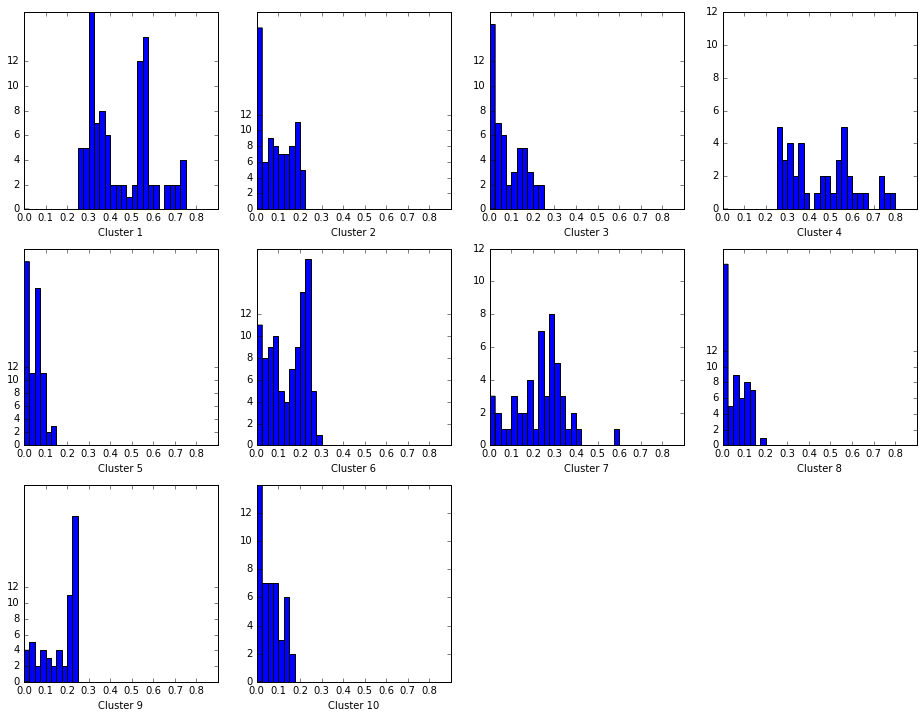

In [29]:
fig = plt.figure(figsize = [16,12])
dxticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] #change to suit
dyticks = [0,2,4,6,8,10,12] #change to suit
for i in range(0, clusternos.max()):
    cluster = clusterdf(opdata, (i+1), 'Desalination Full Production Threshold')
    clustlab = 'Cluster %d' % (i+1)
    ax = fig.add_subplot(3,4,(i+1))
    ax.hist(cluster['Desalination Full Production Threshold'], 
                                 bins = 32, 
                                 range = (0,0.8)
                                 )
    ax.set_xticks(dxticks)
    ax.set_yticks(dyticks)
    ax.set_xlabel(clustlab)
    
# save figure - uncheck below to save to png
#plt.savefig('Histograms/histograms desal full.png', dpi=150, bbox_inches='tight')

In [30]:
plt.close(fig)

## 3.3 Plot KDE of decision variable values for each cluster

Desalination full threshold kernel density estimate as lines on one plot

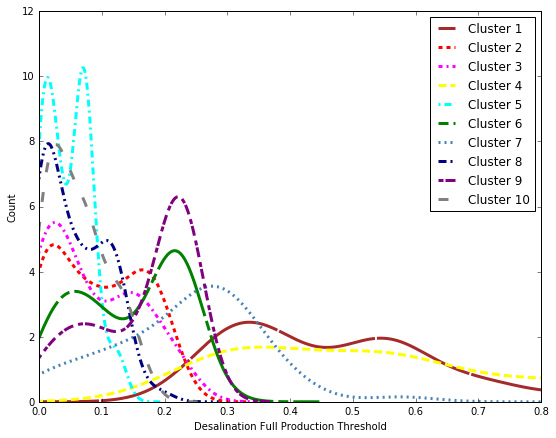

In [31]:
fig, axes = plt.subplots(1, 1, figsize = [9,7])
for i in range(0, clusternos.max()):
    cluster = clusterdf(opdata, (i+1), 'Desalination Full Production Threshold')
    clustlab = 'Cluster %d' % (i+1)
    cluster['Desalination Full Production Threshold'].plot(kind = 'kde', color = clustcols[i], lw = 3,
                                                           dashes = linestyles[i], label = clustlab)
    plt.xlim(0,0.8)
    plt.legend()
    plt.xlabel('Desalination Full Production Threshold')
    plt.ylabel('Count')
    
# save figure - uncheck below to save to png
#plt.savefig('Histograms/histogram kde desal full.png', dpi=150, bbox_inches='tight')

In [32]:
plt.close(fig)

## 3.4 Plot histograms of decision variables for Cluster 2

Decision variable histograms for Cluster 2, one variable per subplot

This can be used to examine the neighbouring operating rules of a chosen Medoid.

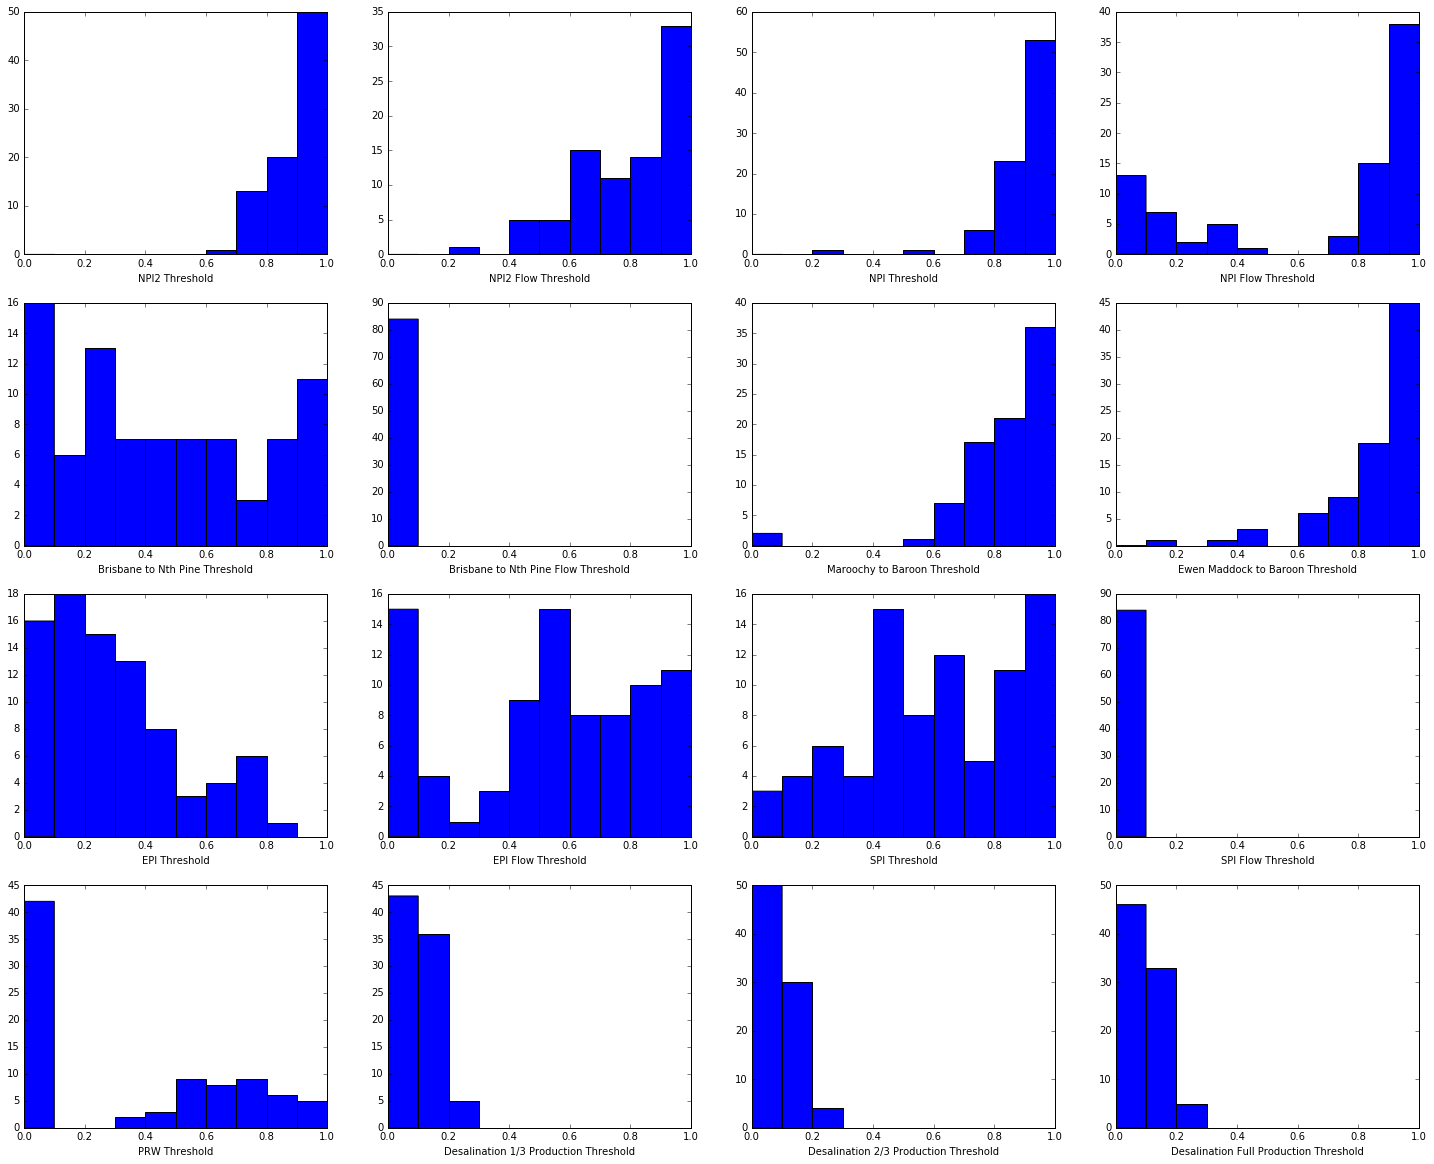

In [52]:
dims = dimensions(len(dvdf.columns))

fig = plt.figure(figsize = [dims[1]*5*1.25, dims[0]*5]) 
    #figsize adjusted for extra wspace between plots to alow for long xlabels

for i in range(0, len(dvdf.columns)):
    column = dvdf.columns[i]
    cluster = clusterdf(opdata, 2, column)
    ax = fig.add_subplot(dims[0], dims[1], i+1)
    ax.hist(cluster[column], bins = 10, range = (0,1.0))
    ax.set_xticks(dvticks)
    ax.set_xlabel(column)

# save figure - uncheck below to save to png
#plt.savefig('Histograms/histograms dvs cluster 2.png', dpi = 150, bbox_inches='tight')

In [35]:
plt.close(fig)